In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**2. Dùng thuật toán gradient descent, implement thuật toán logistic regeression**

In [62]:
class LogisticRegression:
    def __init__(self, num_interations, alpha, w = None):
        self.w = w
        self.num_interations = num_interations
        self.alpha = alpha
        
    def gradient_descent(self):
        return self.w
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def predict(self, x): 
        y_predict = self.sigmoid(np.dot(x, self.w))
        return y_predict
    
    def fit_logistic_regression(self, x, w):
        r, c = x.shape
        x = np.hstack((np.ones((r, 1)), x))
        self.w = np.array([0.,0.1,0.1]).reshape(-1,1)
        
        for i in range(1, self.num_interations):
            y_predict = self.predict(x)
            cost = - np.sum(y * np.log(y_predict) + (1 - y) * np.log(1-y_predict))
            self.w = self.w - self.alpha * np.dot(x.T, y_predict - y)            

**3. Chạy toán toán logistic regression implement ở ý 2 cho dataset,  https://github.com/nttuan8/DL_Tutorial/blob/master/L2/dataset.csv.**

**4. Vẽ đường boundary cho 2 class**

In [63]:
data = pd.read_csv('dataset.csv')
data.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [64]:
data = data.values
r, c = data.shape
x = data[:, 0:c-1].reshape(-1, c-1)
y = data[:, 2].reshape(-1, 1)

In [65]:
model = LogisticRegression(num_interations = 1000, alpha = 0.01)
model.fit_logistic_regression(x, y)
model.gradient_descent()

array([[-7.25683504],
       [ 0.62975152],
       [ 3.6436906 ]])

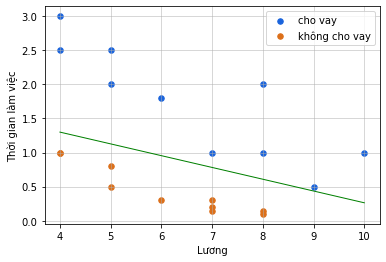

In [66]:
x_cho_vay = x[y[:,0]==1]
x_tu_choi = x[y[:,0]==0]

plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='#1963DC', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='#DC6F19', s=30, label='không cho vay')
plt.legend(loc=1)
plt.grid(axis = "both", lw = 0.5)
plt.xlabel('Lương')
plt.ylabel('Thời gian làm việc')

t = 0.5
plt.plot((4, 10),(-(model.w[0]+4*model.w[1]+ np.log(1/t-1))/model.w[2], -(model.w[0] + 10*model.w[1]+ np.log(1/t-1))/model.w[2]), 'g', linewidth = 1)
plt.show()